In [1]:
# Data handling with numpy
import numpy as np
import h5py
import os
#np.set_printoptions(threshold=np.inf)

# Metric handling wit sklearn
from sklearn import metrics

# Reading the HDF5 file with pandas
import pandas as pd

# Plotting libraries
import ctaplot
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import plot_irf

# (Default ctaplot) energy binning 
E_bin = np.logspace(np.log10(2.51e-02), 2, 19)
E = ctaplot.ana.logbin_mean(E_bin)
print(E_bin.shape)

(19,)


files = {}
files['separation'] = {'nocut': '/home/pietro/CTA/results/cuts_before/separation/nocuts_0.77350_0.76263.pkl',
                     'lowcut': '/home/pietro/CTA/results/cuts_before/separation/lowcuts_0.79897_0.78493.pkl',
                     'midcut': '/home/pietro/CTA/results/cuts_before/separation/midcuts_0.84833_0.83863.pkl',
                     'highcut': '/home/pietro/CTA/results/cuts_before/separation/highcuts_0.93938_0.92490.pkl'
                      }
files['regression'] = {'nocut': '/home/pietro/CTA/results/cuts_before/regression/nocuts_0.24573_0.25495.pkl',
                   'lowcut': '/home/pietro/CTA/results/cuts_before/regression/lowcuts_0.21761_0.22290.pkl',
                   'midcut': '/home/pietro/CTA/results/cuts_before/regression/midcuts_0.15944_0.17980.pkl',
                   'highcut': '/home/pietro/CTA/results/cuts_before/regression/highcuts_0.06644_0.10034.pkl'
                   }
rf_path = "../RF_lstchain_20200706_v0.5.2_local_no_gammaness_cut.h5"

In [139]:
dirs = {}

features = ['particle', 'direction', 'energy']
for feat in features:
    dirs['{}'.format(feat)] = {}
    cut_list = ['nocut', 's50', 's200', 's1000']
    for cut in cut_list:
        dirs[feat]['{}'.format(cut)] = '/home/pietro/CTA/bigdata/results/{}/96x88/{}/all'.format(feat,cut)

        

In [140]:
dirs

{'particle': {'nocut': '/home/pietro/CTA/bigdata/results/particle/96x88/nocut/all',
  's50': '/home/pietro/CTA/bigdata/results/particle/96x88/s50/all',
  's200': '/home/pietro/CTA/bigdata/results/particle/96x88/s200/all',
  's1000': '/home/pietro/CTA/bigdata/results/particle/96x88/s1000/all'},
 'direction': {'nocut': '/home/pietro/CTA/bigdata/results/direction/96x88/nocut/all',
  's50': '/home/pietro/CTA/bigdata/results/direction/96x88/s50/all',
  's200': '/home/pietro/CTA/bigdata/results/direction/96x88/s200/all',
  's1000': '/home/pietro/CTA/bigdata/results/direction/96x88/s1000/all'},
 'energy': {'nocut': '/home/pietro/CTA/bigdata/results/energy/96x88/nocut/all',
  's50': '/home/pietro/CTA/bigdata/results/energy/96x88/s50/all',
  's200': '/home/pietro/CTA/bigdata/results/energy/96x88/s200/all',
  's1000': '/home/pietro/CTA/bigdata/results/energy/96x88/s1000/all'}}

rf_path = "/home/pietro/CTA/results/RF_lstchain_20200706_v0.5.2_local_no_gammaness_cut.h5"
rfile = h5py.File(rf_path)
rf_lc = rfile["Low_Cuts"]
rf_mc = rfile["Mid_Cuts"]
rf_hc = rfile["High_Cuts"]
rf_reso = {}

#### ENERGY #####
rf_reso['energy'] = {}
rf_reso['direction'] = {}
##### LOW CUT #####
emylc = []
for x in rf_lc['energy_res'][:]:
    emylc.append(x[0])
emylc
mylc = []
for x in rf_lc['angular_res'][:]:
    mylc.append(x[0]*180/np.pi)
mylc

rf_reso['energy']['lowcut'] = emylc
rf_reso['direction']['lowcut'] = mylc
##### MID CUT #####
emylc = []
for x in rf_mc['energy_res'][:]:
    emylc.append(x[0])
emylc
mylc = []
for x in rf_mc['angular_res'][:]:
    mylc.append(x[0]*180/np.pi)
mylc

rf_reso['energy']['midcut'] = emylc
rf_reso['direction']['midcut'] = mylc
##### high cut #####
emylc = []
for x in rf_hc['energy_res'][:]:
    emylc.append(x[0])
emylc
mylc = []
for x in rf_hc['angular_res'][:]:
    mylc.append(x[0]*180/np.pi)
mylc

rf_reso['energy']['highcut'] = emylc
rf_reso['direction']['highcut'] = mylc

rf_reso

'\nif cut is not \'nocut\':\n    ax = axs[1]\n    \n    ax.set_xlabel("Energy true [TeV]",fontsize=25)\n    ax.set_xscale(\'log\')\n    #ax.set_xlim(0.02, 30)\n    ax.set_title(\'Energy resolution\',fontsize=25)\n    ax.tick_params(labelsize=25)\n    ax.legend()\n    #major and minor grid lines\n    ax.grid(b=True, which=\'major\', color=\'gray\', alpha=0.8, linestyle=\'dashdot\', lw=1.5)\n    ax.minorticks_on()\n    ax.grid(b=True, which=\'minor\', color=\'gray\', alpha=0.2, ls=\'-\', lw=1)\n    perc = (np.array(emylc)/median -1)*100\n    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),\n                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),\n                            label = \'VGG13: mid-cut\', fmt = \'--s\', lw=1.5, markersize=9)\n'

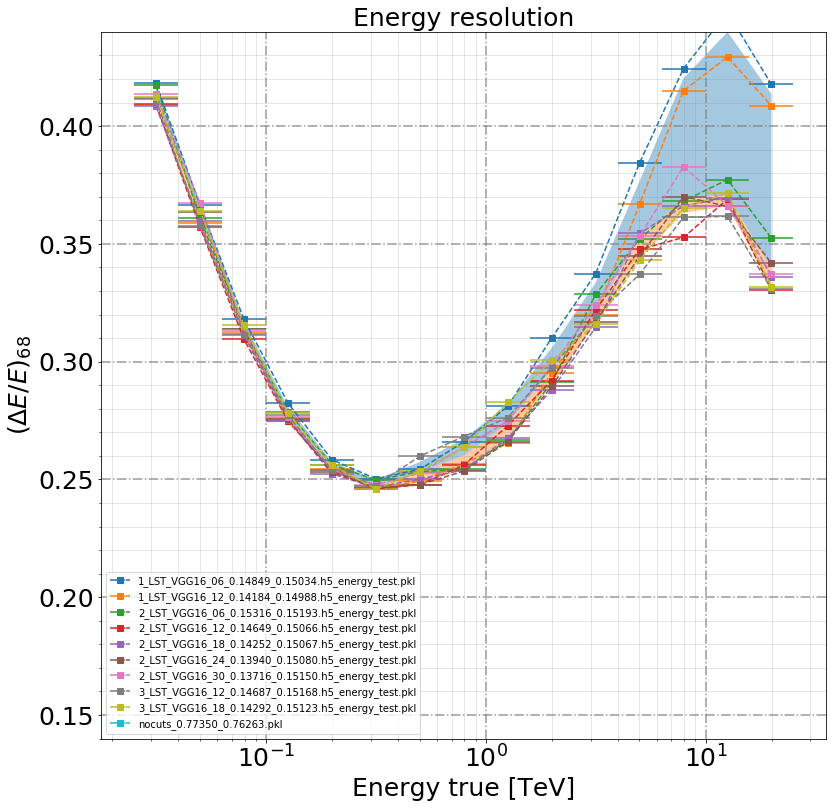

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))#, sharex=True, gridspec_kw={'hspace': 0,'height_ratios': [2.5, 1]})
energy_datapoints = {}
feature = 'energy'
cut = 'nocut'
first=0
last=-3
#fig, ax = plt.subplots(1,figsize=(20,10))
eres_per_seed = [] 
ax = axs
for f in os.listdir(dirs[feature][cut]):
    file = os.path.join(dirs[feature][cut], f)
    data = pd.read_pickle(file)
    #print(data)
    mc_energy = np.power(10,np.array(data['energy_true']))
    reco_energy = np.power(10,np.array(data['energy_reco']))
    
    # Energy resolution
    ebin, eres = ctaplot.ana.energy_resolution_per_energy(mc_energy, reco_energy)
    ax.errorbar(E[first:last], eres[first:last,0], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
    eres_per_seed.append(eres[:,0])
boh = np.min(eres_per_seed, axis=0)
mean = np.mean(eres_per_seed, axis=0)
median = np.median(eres_per_seed, axis=0)
perc_up = np.percentile(eres_per_seed, 84, axis=0)
perc_down = np.percentile(eres_per_seed, 16, axis=0)
#ax.errorbar(E, mean, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut), fmt = '--s')
#if cut is not 'nocut':
#    ax.errorbar(E[first:last], rf_reso[feature][cut][first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
ax.fill_between(E[first:last], median[first:last], perc_up[first:last], alpha=0.4, linewidth=0)
ax.fill_between(E[first:last], median[first:last], perc_down[first:last], alpha=0.4, linewidth=0)
#ax.fill_between(E, mean, mean-std,color=colors[ind], alpha=0.15, linewidth=0)
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])


# Scale, labels and title
ax.set_ylabel(r"$(\Delta E/E)_{68}$",fontsize=25)

ax.set_ybound(0.14,0.44)
#ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xlabel("Energy true [TeV]",fontsize=25)
ax.set_xscale('log')
#ax.set_xlim(0.02, 30)
ax.set_title('Energy resolution',fontsize=25)
ax.tick_params(labelsize=25)
ax.set_xscale('log')
ax.legend()
#major and minor grid lines
ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)



#########################################################################################
'''
if cut is not 'nocut':
    ax = axs[1]
    
    ax.set_xlabel("Energy true [TeV]",fontsize=25)
    ax.set_xscale('log')
    #ax.set_xlim(0.02, 30)
    ax.set_title('Energy resolution',fontsize=25)
    ax.tick_params(labelsize=25)
    ax.legend()
    #major and minor grid lines
    ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)
    perc = (np.array(emylc)/median -1)*100
    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),
                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),
                            label = 'VGG13: mid-cut', fmt = '--s', lw=1.5, markersize=9)
'''

'\nif cut is not \'nocut\':\n    ax = axs[1]\n    \n    ax.set_xlabel("Energy true [TeV]",fontsize=25)\n    ax.set_xscale(\'log\')\n    #ax.set_xlim(0.02, 30)\n    ax.set_title(\'Energy resolution\',fontsize=25)\n    ax.tick_params(labelsize=25)\n    ax.legend()\n    #major and minor grid lines\n    ax.grid(b=True, which=\'major\', color=\'gray\', alpha=0.8, linestyle=\'dashdot\', lw=1.5)\n    ax.minorticks_on()\n    ax.grid(b=True, which=\'minor\', color=\'gray\', alpha=0.2, ls=\'-\', lw=1)\n    perc = (np.array(emylc)/median -1)*100\n    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),\n                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),\n                            label = \'VGG13: mid-cut\', fmt = \'--s\', lw=1.5, markersize=9)\n'

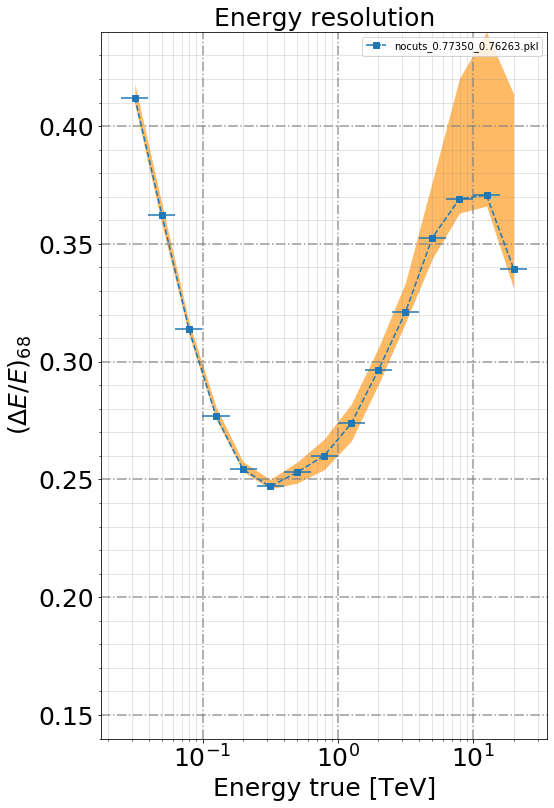

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 13))#, sharex=True, gridspec_kw={'hspace': 0,'height_ratios': [2.5, 1]})

#fig, ax = plt.subplots(1,figsize=(20,10))
eres_per_seed = [] 
ax = axs
for f in os.listdir(dirs[feature][cut]):
    file = os.path.join(dirs[feature][cut], f)
    data = pd.read_pickle(file)
    #print(data)
    mc_energy = np.power(10,np.array(data['energy_true']))
    reco_energy = np.power(10,np.array(data['energy_reco']))
    
    # Energy resolution
    ebin, eres = ctaplot.ana.energy_resolution_per_energy(mc_energy, reco_energy)
    eres_per_seed.append(eres[:,0])
boh = np.min(eres_per_seed, axis=0)
mean = np.mean(eres_per_seed, axis=0)
median = np.median(eres_per_seed, axis=0)
perc_up = np.percentile(eres_per_seed, 84, axis=0)
perc_down = np.percentile(eres_per_seed, 16, axis=0)
#ax.errorbar(E, mean, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut), fmt = '--s')
#if cut is not 'nocut':
#    ax.errorbar(E[first:last], rf_reso[feature][cut][first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
ax.errorbar(E[first:last], median[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
ax.fill_between(E[first:last], median[first:last], perc_up[first:last], alpha=0.6, linewidth=0, color="darkorange")
ax.fill_between(E[first:last], median[first:last], perc_down[first:last], alpha=0.6, linewidth=0, color="darkorange")
#ax.fill_between(E, mean, mean-std,color=colors[ind], alpha=0.15, linewidth=0)
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])


# Scale, labels and title
ax.set_ylabel(r"$(\Delta E/E)_{68}$",fontsize=25)

ax.set_ybound(0.14,0.44)
#ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xlabel("Energy true [TeV]",fontsize=25)
ax.set_xscale('log')
#ax.set_xlim(0.02, 30)
ax.set_title('Energy resolution',fontsize=25)
ax.tick_params(labelsize=25)
ax.set_xscale('log')
ax.legend()
#major and minor grid lines
ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)



#########################################################################################
'''
if cut is not 'nocut':
    ax = axs[1]
    
    ax.set_xlabel("Energy true [TeV]",fontsize=25)
    ax.set_xscale('log')
    #ax.set_xlim(0.02, 30)
    ax.set_title('Energy resolution',fontsize=25)
    ax.tick_params(labelsize=25)
    ax.legend()
    #major and minor grid lines
    ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)
    perc = (np.array(emylc)/median -1)*100
    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),
                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),
                            label = 'VGG13: mid-cut', fmt = '--s', lw=1.5, markersize=9)
'''

In [ ]:
energy_datapoints = {}
feature = 'direction'
cut = 'highcut'
fig, ax = plt.subplots(1,figsize=(20,10))
eres_per_seed = [] 
for f in os.listdir(dirs[feature][cut]):
    file = os.path.join(dirs[feature][cut], f)
    data = pd.read_pickle(file)
    #print(data)
    mc_energy = np.power(10,np.array(data['energy_true']))
    reco_energy = np.power(10,np.array(data['energy_reco']))
    
    # Energy resolution
    mc_alt = np.array(data['d_alt_true'])
    reco_alt = np.array(data['d_alt_reco'])
    mc_az = np.array(data['d_az_true'])
    reco_az = np.array(data['d_az_reco'])
boh = np.min(eres_per_seed, axis=0)
mean = np.mean(eres_per_seed, axis=0)
median = np.median(eres_per_seed, axis=0)
perc_up = np.percentile(eres_per_seed, 84, axis=0)
perc_down = np.percentile(eres_per_seed, 16, axis=0)
#ax.errorbar(E, mean, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])
ax.errorbar(E, mean, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        label = '{}'.format(cut), fmt = '--s')
ax.fill_between(E, mean, perc_up, alpha=0.4, linewidth=0)
ax.fill_between(E, mean, perc_down, alpha=0.4, linewidth=0)
#ax.fill_between(E, mean, mean-std,color=colors[ind], alpha=0.15, linewidth=0)
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])

# Scale, labels and title
ax.set_ylabel(r"$(\Delta E/E)_{68}$",fontsize=25)

ax.set_ybound(0.14,0.44)
#ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xlabel("Energy true [TeV]",fontsize=25)
ax.set_xscale('log')
ax.set_xlim(0.02, 4)
ax.set_title('Energy resolution',fontsize=25)
ax.tick_params(labelsize=25)
ax.set_xscale('log')

####################################################################################################################

'\nif cut is not \'nocut\':\n    ax = axs[1]\n    \n    ax.set_xlabel("Energy true [TeV]",fontsize=25)\n    ax.set_xscale(\'log\')\n    #ax.set_xlim(0.02, 30)\n    ax.set_title(\'Energy resolution\',fontsize=25)\n    ax.tick_params(labelsize=25)\n    ax.legend()\n    #major and minor grid lines\n    ax.grid(b=True, which=\'major\', color=\'gray\', alpha=0.8, linestyle=\'dashdot\', lw=1.5)\n    ax.minorticks_on()\n    ax.grid(b=True, which=\'minor\', color=\'gray\', alpha=0.2, ls=\'-\', lw=1)\n    perc = (np.array(emylc)/median -1)*100\n    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),\n                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),\n                            label = \'VGG13: mid-cut\', fmt = \'--s\', lw=1.5, markersize=9)\n'

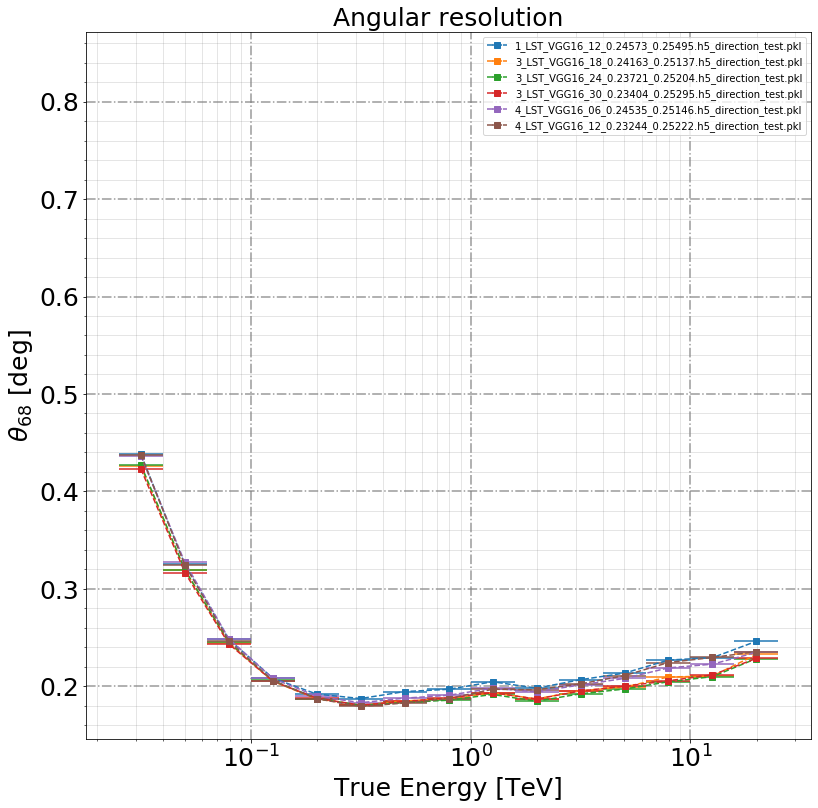

In [137]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))#, sharex=True, gridspec_kw={'hspace': 0,'height_ratios': [2.5, 1]})
energy_datapoints = {}
feature = 'direction'
cut = 'nocut'
first=0
last=-3
#fig, ax = plt.subplots(1,figsize=(20,10))
angres_per_seed = [] 
ax = axs
for f in os.listdir(dirs[feature][cut]):
    file = os.path.join(dirs[feature][cut], f)
    data = pd.read_pickle(file)
    #print(data)
    mc_energy = np.power(10,np.array(data['energy_true']))
    #reco_energy = np.power(10,np.array(data['energy_reco']))
    mc_alt = np.array(data['d_alt_true'])
    reco_alt = np.array(data['d_alt_reco'])
    mc_az = np.array(data['d_az_true'])
    reco_az = np.array(data['d_az_reco'])
    
    # angular resolution
    ebin, angres = ctaplot.ana.angular_resolution_per_energy(mc_alt, mc_az, reco_alt, reco_az, mc_energy)
    ax.errorbar(E[first:last], angres[first:last,0], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
    angres_per_seed.append(eres[:,0])
boh = np.min(angres_per_seed, axis=0)
mean = np.mean(angres_per_seed, axis=0)
median = np.median(angres_per_seed, axis=0)
perc_up = np.percentile(angres_per_seed, 84, axis=0)
perc_down = np.percentile(angres_per_seed, 16, axis=0)
#ax.errorbar(E, mean, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut), fmt = '--s')
#if cut is not 'nocut':
#    ax.errorbar(E[first:last], rf_reso[feature][cut][first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
ax.fill_between(E[first:last], median[first:last], perc_up[first:last], alpha=0.4, linewidth=0)
ax.fill_between(E[first:last], median[first:last], perc_down[first:last], alpha=0.4, linewidth=0)
#ax.fill_between(E, mean, mean-std,color=colors[ind], alpha=0.15, linewidth=0)
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])


# Scale, labels and title
#ax.set_ylabel(r"$(\Delta E/E)_{68}$",fontsize=25)

#ax.set_ybound(0.06,0.45)
ax.set_ylabel(r'$\theta_{68}$ [deg]',fontsize=25)
#ax.set_ybound(0.01,0.5)
#ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xlabel("True Energy [TeV]",fontsize=25)
ax.set_xscale('log')
ax.set_title('Angular resolution',fontsize=25)
ax.tick_params(labelsize=25)
ax.set_xscale('log')
ax.legend()
#major and minor grid lines
ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)



#########################################################################################
'''
if cut is not 'nocut':
    ax = axs[1]
    
    ax.set_xlabel("Energy true [TeV]",fontsize=25)
    ax.set_xscale('log')
    #ax.set_xlim(0.02, 30)
    ax.set_title('Energy resolution',fontsize=25)
    ax.tick_params(labelsize=25)
    ax.legend()
    #major and minor grid lines
    ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)
    perc = (np.array(emylc)/median -1)*100
    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),
                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),
                            label = 'VGG13: mid-cut', fmt = '--s', lw=1.5, markersize=9)
'''

'\nif cut is not \'nocut\':\n    ax = axs[1]\n    \n    ax.set_xlabel("Energy true [TeV]",fontsize=25)\n    ax.set_xscale(\'log\')\n    #ax.set_xlim(0.02, 30)\n    ax.set_title(\'Energy resolution\',fontsize=25)\n    ax.tick_params(labelsize=25)\n    ax.legend()\n    #major and minor grid lines\n    ax.grid(b=True, which=\'major\', color=\'gray\', alpha=0.8, linestyle=\'dashdot\', lw=1.5)\n    ax.minorticks_on()\n    ax.grid(b=True, which=\'minor\', color=\'gray\', alpha=0.2, ls=\'-\', lw=1)\n    perc = (np.array(emylc)/median -1)*100\n    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),\n                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),\n                            label = \'VGG13: mid-cut\', fmt = \'--s\', lw=1.5, markersize=9)\n'

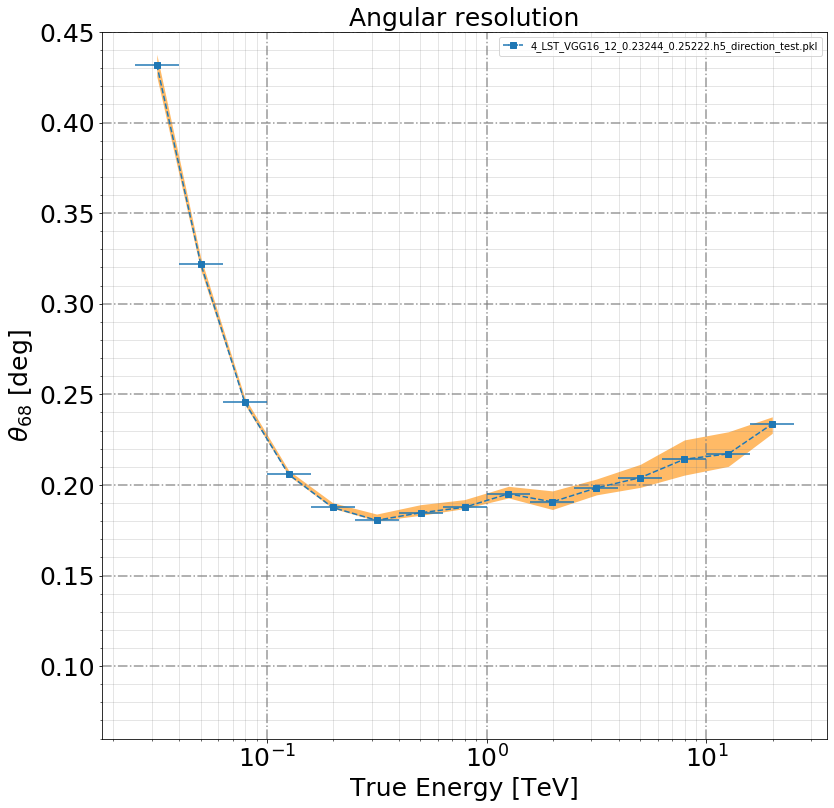

In [138]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))#, sharex=True, gridspec_kw={'hspace': 0,'height_ratios': [2.5, 1]})
energy_datapoints = {}

#fig, ax = plt.subplots(1,figsize=(20,10))
angres_per_seed = [] 
ax = axs
for f in os.listdir(dirs[feature][cut]):
    file = os.path.join(dirs[feature][cut], f)
    data = pd.read_pickle(file)
    #print(data)
    mc_energy = np.power(10,np.array(data['energy_true']))
    #reco_energy = np.power(10,np.array(data['energy_reco']))
    mc_alt = np.array(data['d_alt_true'])
    reco_alt = np.array(data['d_alt_reco'])
    mc_az = np.array(data['d_az_true'])
    reco_az = np.array(data['d_az_reco'])
    
    # angular resolution
    ebin, angres = ctaplot.ana.angular_resolution_per_energy(mc_alt, mc_az, reco_alt, reco_az, mc_energy)
    angres_per_seed.append(angres[:,0])
boh = np.min(angres_per_seed, axis=0)
mean = np.mean(angres_per_seed, axis=0)
median = np.median(angres_per_seed, axis=0)
perc_up = np.percentile(angres_per_seed, 84, axis=0)
perc_down = np.percentile(angres_per_seed, 16, axis=0)
#ax.errorbar(E, mean, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut), fmt = '--s')
#if cut is not 'nocut':
#    ax.errorbar(E[first:last], rf_reso[feature][cut][first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
ax.errorbar(E[first:last], median[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),label = f, fmt = '--s')
ax.fill_between(E[first:last], median[first:last], perc_up[first:last], alpha=0.6, linewidth=0,color="darkorange")
ax.fill_between(E[first:last], median[first:last], perc_down[first:last], alpha=0.6, linewidth=0, color="darkorange")
#ax.fill_between(E, mean, mean-std,color=colors[ind], alpha=0.15, linewidth=0)
#ax.errorbar(E, boh, xerr=(E - E_bin[:-1], E_bin[1:] - E),
                        #label = '{}'.format(cut))#, #fmt = fmts[ind], color=colors[ind])


# Scale, labels and title
#ax.set_ylabel(r"$(\Delta E/E)_{68}$",fontsize=25)

ax.set_ybound(0.06,0.45)
ax.set_ylabel(r'$\theta_{68}$ [deg]',fontsize=25)
#ax.set_ybound(0.01,0.5)
#ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xlabel("True Energy [TeV]",fontsize=25)
ax.set_xscale('log')
ax.set_title('Angular resolution',fontsize=25)
ax.tick_params(labelsize=25)
ax.set_xscale('log')
ax.legend()
#major and minor grid lines
ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)



#########################################################################################
'''
if cut is not 'nocut':
    ax = axs[1]
    
    ax.set_xlabel("Energy true [TeV]",fontsize=25)
    ax.set_xscale('log')
    #ax.set_xlim(0.02, 30)
    ax.set_title('Energy resolution',fontsize=25)
    ax.tick_params(labelsize=25)
    ax.legend()
    #major and minor grid lines
    ax.grid(b=True, which='major', color='gray', alpha=0.8, linestyle='dashdot', lw=1.5)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='gray', alpha=0.2, ls='-', lw=1)
    perc = (np.array(emylc)/median -1)*100
    ax.errorbar(E[first:last], perc[first:last], xerr=(E[first:last] - E_bin[first:last][:-1], E_bin[first:last][1:] - E[first:last]),
                            #yerr=(angres[1:last][:, 0] - angres[1:last][:, 1], angres[1:last][:, 2] - angres[1:last][:, 0]),
                            label = 'VGG13: mid-cut', fmt = '--s', lw=1.5, markersize=9)
'''

In [ ]:
hrf = h5_rf['High_Cuts']['angular_res'][:]

######################################################################################

# PARTICLE CLASSIFICATION

0.8828056056595175 0.8835403985234561 0.8824507906440663


/home/pietro/miniconda3/envs/cta-dev/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


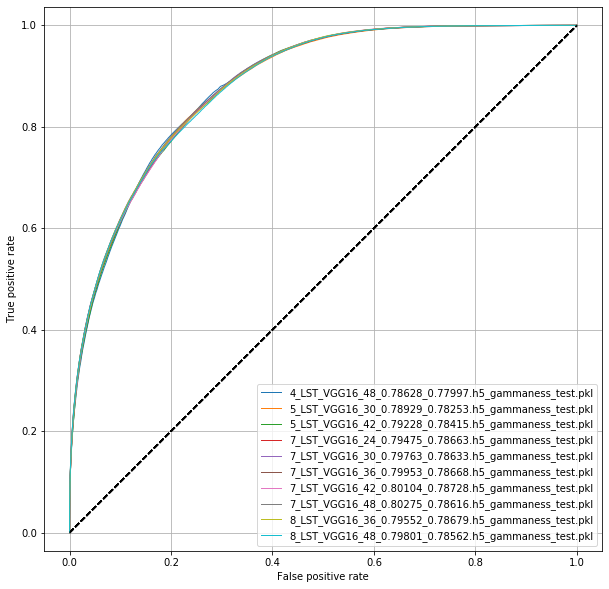

In [261]:
feature = "particle"
cut = "s50"
aucs = []
auc_dict = {}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
#fig=plt.figure(figsize=(10,5))
for f in os.listdir(dirs[feature][cut]):
    file = os.path.join(dirs[feature][cut], f)
    data = pd.read_pickle(file)
    mc_particle = np.array(data['class']).astype(int) #np.concatenate((proton_mc_particle, gamma_mc_particle))
    #reco_particle = np.array(data['gammaness']).round().astype(int) #np.concatenate((proton_reco_particle, gamma_reco_particle))
    reco_gammaness = np.array(data['gammaness']).astype(float) #np.concatenate((proton_reco_gammaness, gamma_reco_gammaness))
    fpr, tpr, thresholds = metrics.roc_curve(mc_particle, reco_gammaness)
    ax = ctaplot.plot_roc_curve(mc_particle, reco_gammaness, lw=1, label=f)
    auc = metrics.auc(fpr, tpr)
    aucs.append(auc)
    #ax.scatter(cut, auc, label=f)
    auc_dict[f] = auc

mean = np.mean(aucs)
med = np.median(aucs)
upper = np.percentile(aucs, 84)
lower = np.percentile(aucs, 16)
print(med, upper, lower)
#plt.scatter("mean",med)
#plt.vlines("mean", lower, upper)
#print(aucs)
plt.legend()    


In [252]:
auc_dict

{'4_LST_VGG16_36_0.78285_0.77917.h5_gammaness_test.pkl': 0.8801529028186873,
 '4_LST_VGG16_42_0.78481_0.77954.h5_gammaness_test.pkl': 0.8801215299833838,
 '4_LST_VGG16_48_0.78628_0.77997.h5_gammaness_test.pkl': 0.8826858514755462,
 '5_LST_VGG16_30_0.78929_0.78253.h5_gammaness_test.pkl': 0.8825197291868301,
 '5_LST_VGG16_36_0.79112_0.78439.h5_gammaness_test.pkl': 0.8820509521444684,
 '5_LST_VGG16_42_0.79228_0.78415.h5_gammaness_test.pkl': 0.8821244416894194,
 '7_LST_VGG16_24_0.79475_0.78663.h5_gammaness_test.pkl': 0.8834306998510937,
 '7_LST_VGG16_30_0.79763_0.78633.h5_gammaness_test.pkl': 0.8836265903374552,
 '7_LST_VGG16_36_0.79953_0.78668.h5_gammaness_test.pkl': 0.8829253598434887,
 '7_LST_VGG16_42_0.80104_0.78728.h5_gammaness_test.pkl': 0.8826614672924695,
 '7_LST_VGG16_48_0.80275_0.78616.h5_gammaness_test.pkl': 0.8841437844916513,
 '8_LST_VGG16_36_0.79552_0.78679.h5_gammaness_test.pkl': 0.8834285513670519,
 '8_LST_VGG16_48_0.79801_0.78562.h5_gammaness_test.pkl': 0.8823966246461804}